# Portfolio Theory - Markovitz Model

This code, provided by professor [Tiziana Ciano](https://www.linkedin.com/in/tiziana-ciano-2b817b14a/), has been optimized/updated after Yahoo Finance new update concerning MultiIndex issues.

## During RUS-UKR war

### Defense portfolio

[*********************100%***********************]  5 of 5 completed


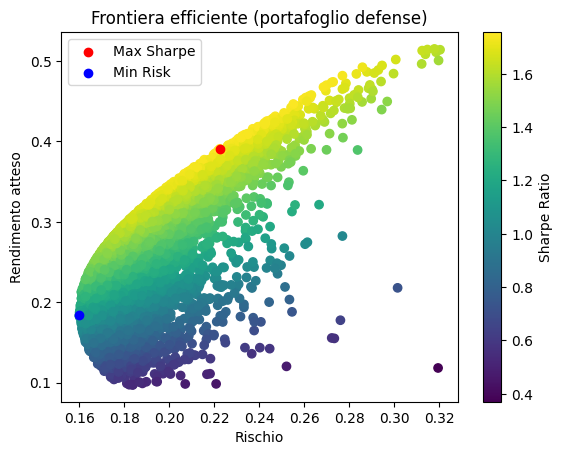

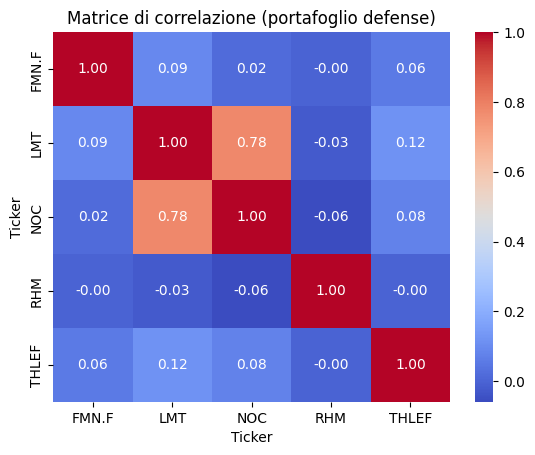

Portafoglio con massimo Sharpe Ratio:
 Rendimento atteso: 39.09%
 Rischio: 22.26%

Portafoglio con rischio minimo:
 Rendimento atteso: 18.37%
 Rischio: 16.01%

Sharpe Portfolio Max Sharpe: 1.67
Sharpe Portfolio Min Risk: 1.02


In [1]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# filter future warnings for privacy matters
warnings.simplefilter(action="ignore", category=FutureWarning)

# shares included in portfolio
tickers = ['LMT', 'RHM', 'NOC', 'THLEF', 'FMN.F']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-02-24')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()    # daily returns
mean_returns = returns.mean() * 252     # mean annual returns
cov_matrix = returns.cov() * 252        # annual covariance matrix
correlation_matrix = returns.corr()     # annual correlation matrix
num_portfolios = 10000                  # num of simulations

# prepare arrays for results
results = np.zeros((3, num_portfolios))
weights_record = []

# simulations or random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # calculate sharp ratio and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # save results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

# convert results in DF (DataFrame)
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente (portafoglio defense)')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()

# correlation matrix
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione (portafoglio defense)')
plt.show()

# print details of optimized portfolios
print("Portafoglio con massimo Sharpe Ratio:")
print(f" Rendimento atteso: {max_sharpe_portfolio['Return']:.2%}")
print(f" Rischio: {max_sharpe_portfolio['Risk']:.2%}")
print("\nPortafoglio con rischio minimo:")
print(f" Rendimento atteso: {min_risk_portfolio['Return']:.2%}")
print(f" Rischio: {min_risk_portfolio['Risk']:.2%}")

# portfolio sharpe ratio
risk_free = 0.02        # 2% per year
max_sharpe_ratio = (0.4090 - risk_free) / 0.233     
min_sharpe_ratio = (0.1827 - risk_free) / 0.16

print(f"\nSharpe Portfolio Max Sharpe: {max_sharpe_ratio:.2f}")
print(f"Sharpe Portfolio Min Risk: {min_sharpe_ratio:.2f}")


### Benchmarks of comparison
* ETF MSCI World - global shares market index
* ETF Aerospace & Defense - global defense shares index

In [2]:
# benchmark tickers
benchmarks = {
    'MSCI_World': 'URTH',   # ETF MSCI World
    'Aero_Defense': 'ITA'   # ETF Aerospace & Defense
}

# download data
bench_data = yf.download(list(benchmarks.values()), start='2022-02-24', end='2025-02-24')['Close']

# calculate cumulative return
bench_returns = bench_data.pct_change().dropna()
bench_cum_returns = (1 + bench_returns).cumprod()

# avg annual return and risk for benchmark
bench_mean_returns = bench_returns.mean() * 252
bench_volatility = bench_returns.std() * np.sqrt(252)

# print results
for label, ticker in benchmarks.items():
    print(f"\n{label}:")
    print(f" Rendimento atteso: {bench_mean_returns[ticker]:.2%}")
    print(f" Rischio: {bench_volatility[ticker]:.2%}")

# print Sharpe Ratio (no risk-free)
bench_sharpe = bench_mean_returns / bench_volatility
print(f"\nSharpe ratio: \n{bench_sharpe}")

[*********************100%***********************]  2 of 2 completed


MSCI_World:
 Rendimento atteso: 12.27%
 Rischio: 16.53%

Aero_Defense:
 Rendimento atteso: 14.68%
 Rischio: 18.45%

Sharpe ratio: 
Ticker
ITA     0.796034
URTH    0.741984
dtype: float64


### Diversified portfolio

[*********************100%***********************]  5 of 5 completed


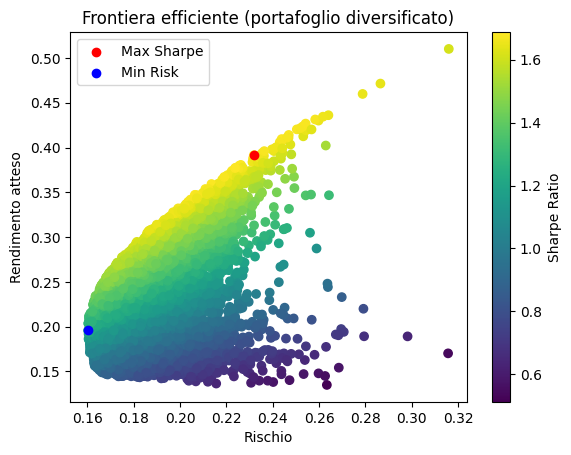

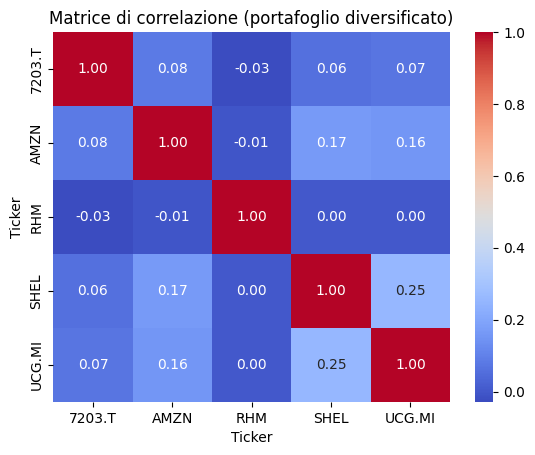

Portafoglio con massimo Sharpe Ratio:
 Rendimento atteso: 39.13%
 Rischio: 23.18%

Portafoglio con rischio minimo:
 Rendimento atteso: 19.57%
 Rischio: 16.03%

Sharpe Portfolio Max Sharpe: 1.67
Sharpe Portfolio Min Risk: 1.02


In [3]:
# shares included in portfolio
tickers = ['UCG.MI', 'RHM', 'AMZN', 'SHEL', '7203.T']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-02-24')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()    # daily returns
mean_returns = returns.mean() * 252     # mean annual returns
cov_matrix = returns.cov() * 252        # annual covariance matrix
correlation_matrix = returns.corr()     # annual correlation matrix
num_portfolios = 10000                  # num of simulations

# prepare arrays for results
results = np.zeros((3, num_portfolios))
weights_record = []

# simulations or random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # calculate sharp ratio and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # save results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

# convert results in DF (DataFrame)
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente (portafoglio diversificato)')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()

# visualize correlation matrix
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione (portafoglio diversificato)')
plt.show()

# print details of optimized portfolios
print("Portafoglio con massimo Sharpe Ratio:")
print(f" Rendimento atteso: {max_sharpe_portfolio['Return']:.2%}")
print(f" Rischio: {max_sharpe_portfolio['Risk']:.2%}")
print("\nPortafoglio con rischio minimo:")
print(f" Rendimento atteso: {min_risk_portfolio['Return']:.2%}")
print(f" Rischio: {min_risk_portfolio['Risk']:.2%}")

# portfolio sharpe ratio
risk_free = 0.02        # 2% per year
max_sharpe_ratio = (0.4090 - risk_free) / 0.233     
min_sharpe_ratio = (0.1827 - risk_free) / 0.16

print(f"\nSharpe Portfolio Max Sharpe: {max_sharpe_ratio:.2f}")
print(f"Sharpe Portfolio Min Risk: {min_sharpe_ratio:.2f}")

## Before RUS-UKR War

### Defense Portolio

[*********************100%***********************]  5 of 5 completed


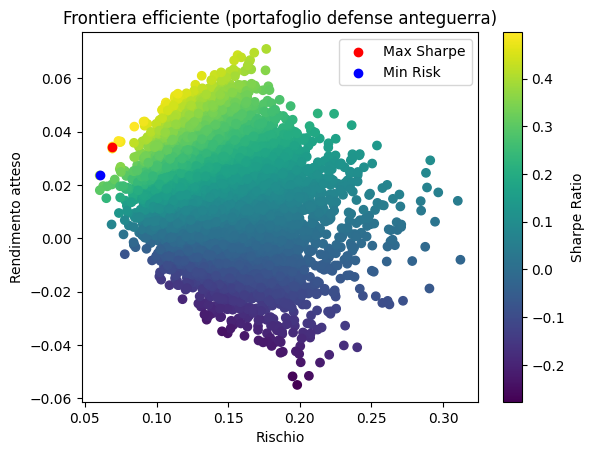

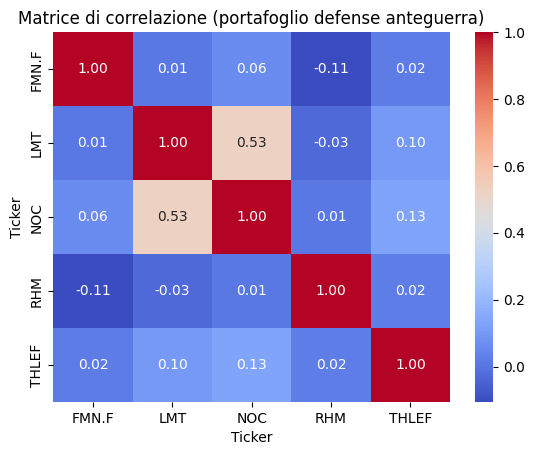

Portafoglio con massimo Sharpe Ratio:
 Rendimento atteso: 3.44%
 Rischio: 6.92%

Portafoglio con rischio minimo:
 Rendimento atteso: 2.36%
 Rischio: 6.03%

Sharpe Portfolio Max Sharpe: 1.67
Sharpe Portfolio Min Risk: 1.02


[*********************100%***********************]  2 of 2 completed


MSCI_World:
 Rendimento atteso: 13.77%
 Rischio: 19.19%

Aero_Defense:
 Rendimento atteso: 10.38%
 Rischio: 25.75%

Sharpe ratio: 
Ticker
ITA     0.402902
URTH    0.717589
dtype: float64


In [ ]:
# shares included in portfolio
tickers = ['LMT', 'RHM', 'NOC', 'THLEF', 'FMN.F']

# download adjusted data for each ticker
data = yf.download(tickers, start='2019-02-24', end='2022-02-24')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()    # daily returns
mean_returns = returns.mean() * 252     # mean annual returns
cov_matrix = returns.cov() * 252        # annual covariance matrix
correlation_matrix = returns.corr()     # annual correlation matrix
num_portfolios = 10000                  # num of simulations

# prepare arrays for results
results = np.zeros((3, num_portfolios))
weights_record = []

# simulations or random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # calculate sharp ratio and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # save results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

# convert results in DF (DataFrame)
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente (portafoglio defense anteguerra)')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()

# visualize correlation matrix
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione (portafoglio defense anteguerra)')
plt.show()

# print details of optimized portfolios
print("Portafoglio con massimo Sharpe Ratio:")
print(f" Rendimento atteso: {max_sharpe_portfolio['Return']:.2%}")
print(f" Rischio: {max_sharpe_portfolio['Risk']:.2%}")
print("\nPortafoglio con rischio minimo:")
print(f" Rendimento atteso: {min_risk_portfolio['Return']:.2%}")
print(f" Rischio: {min_risk_portfolio['Risk']:.2%}")

# portfolio sharpe ratio
risk_free = 0.02        # 2% per year
max_sharpe_ratio = (0.4090 - risk_free) / 0.233     
min_sharpe_ratio = (0.1827 - risk_free) / 0.16
print(f"\nSharpe Portfolio Max Sharpe: {max_sharpe_ratio:.2f}")
print(f"Sharpe Portfolio Min Risk: {min_sharpe_ratio:.2f}")

# download benchmarks data
bench_data = yf.download(list(benchmarks.values()), start='2019-02-24', end='2025-02-24')['Close']

# calculate cumulative return
bench_returns = bench_data.pct_change().dropna()
bench_cum_returns = (1 + bench_returns).cumprod()

# avg annual return and risk for benchmark
bench_mean_returns = bench_returns.mean() * 252
bench_volatility = bench_returns.std() * np.sqrt(252)

# print results
for label, ticker in benchmarks.items():
    print(f"\n{label}:")
    print(f" Rendimento atteso: {bench_mean_returns[ticker]:.2%}")
    print(f" Rischio: {bench_volatility[ticker]:.2%}")

# print Sharpe Ratio (no risk-free)
bench_sharpe = bench_mean_returns / bench_volatility
print(f"\nSharpe ratio: \n{bench_sharpe}")

# Alternative portfolios

Optional portfolios for this type of analytics.

## Eneregetics Portfolio

[*********************100%***********************]  5 of 5 completed


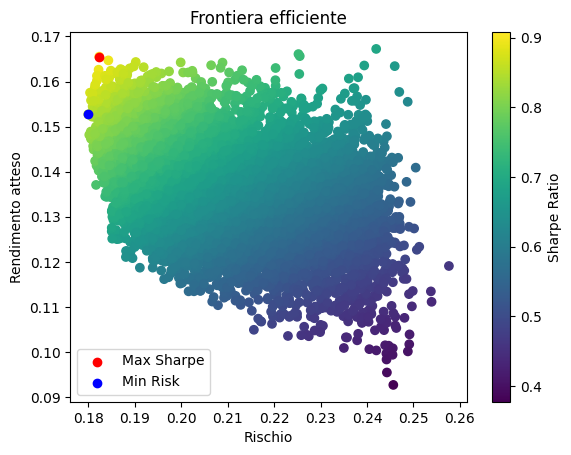

In [5]:
# shares included in portfolio
tickers = ['XOM', 'CVX', 'SHEL', 'BP', 'ENL.DE']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_portfolios = 10000

results = np.zeros((3, num_portfolios))
weights_record = []

# calculations
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()


## Tech Portfolio

[*********************100%***********************]  5 of 5 completed


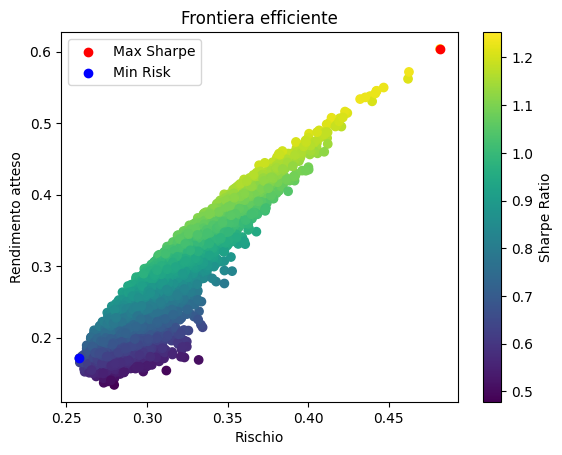

In [6]:
# shares included in portfolio
tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_portfolios = 10000

results = np.zeros((3, num_portfolios))
weights_record = []

# calculations
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()